<a href="https://colab.research.google.com/github/hrbolek/learning/blob/with_stack/notebooks/vasis/05d_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-means

In [1]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Převzato z https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

K-means je algoritmus pro seskupení datových entit podle jejich atributů. Z tohoto hlediska je "přibuzným algoritmem" k hierarchický clustering.

K-means je pravděpodobně nejrychlejší clusterovací algoritmus. Má dílčí problémy (tzv. lokální minimum), proto se může jevit jako účelné spustit je vícekrát pro nalezení nejlepšího výsledku.

Dokumentace ke K-means v sklearn je zde https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Wikipedie https://en.wikipedia.org/wiki/K-means_clustering

In [2]:
import matplotlib.pyplot as plt
import numpy as np

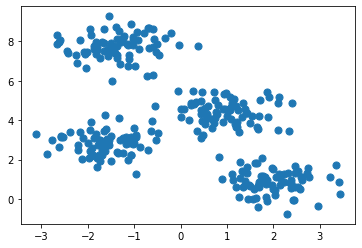

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [4]:
print(X)

[[ 8.36856841e-01  2.13635938e+00]
 [-1.41365810e+00  7.40962324e+00]
 [ 1.15521298e+00  5.09961887e+00]
 [-1.01861632e+00  7.81491465e+00]
 [ 1.27135141e+00  1.89254207e+00]
 [ 3.43761754e+00  2.61654166e-01]
 [-1.80822253e+00  1.59701749e+00]
 [ 1.41372442e+00  4.38117707e+00]
 [-2.04932168e-01  8.43209665e+00]
 [-7.11099611e-01  8.66043846e+00]
 [-1.71237268e+00  2.77780226e+00]
 [-2.67000792e+00  8.35389140e+00]
 [ 1.24258802e+00  4.50399192e+00]
 [-2.22783649e+00  6.89479938e+00]
 [ 1.45513831e+00 -2.91989981e-02]
 [ 4.53791789e-01  3.95647753e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 2.56936589e+00  5.07048304e-01]
 [-1.06690610e+00  3.13165795e+00]
 [-1.07859101e+00  2.20451529e+00]
 [ 2.71506328e+00  1.29082190e+00]
 [ 1.77710994e+00  1.18655254e+00]
 [ 7.34363910e-01  5.03725437e+00]
 [-1.99648151e+00  2.85164868e+00]
 [-1.91828017e+00  2.60516867e+00]
 [-5.55523811e-01  4.69595848e+00]
 [ 1.69747910e+00  8.66123282e-01]
 [ 5.94762432e-01  4.70964730e+00]
 [-2.88024255e+00  2

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
kmeans.inertia_

[2 1 3 1 2 2 0 3 1 1 0 1 3 1 2 3 3 2 0 0 2 2 3 0 0 3 2 3 0 3 1 1 3 1 1 1 1
 1 0 2 3 0 3 3 0 0 1 0 1 2 0 2 1 2 2 0 1 0 1 2 1 3 1 0 0 0 1 2 1 0 3 0 1 0
 0 1 0 3 2 1 2 3 2 2 1 3 2 3 1 1 3 2 1 0 0 3 2 2 3 0 1 2 1 2 3 2 2 3 1 3 0
 0 2 1 2 3 1 2 2 3 0 2 0 2 2 2 2 0 2 0 1 0 0 2 1 0 0 1 3 1 1 0 3 0 3 0 1 3
 1 1 1 3 1 3 2 0 1 0 2 3 1 3 3 2 3 0 0 3 2 3 3 1 2 3 0 1 2 2 3 0 2 3 0 0 3
 3 3 3 2 1 3 0 3 3 0 0 0 3 0 1 3 0 2 0 3 1 0 1 3 1 3 0 3 3 1 0 0 2 2 3 1 2
 2 0 2 0 3 1 1 3 3 1 3 2 0 3 2 0 1 0 2 3 2 1 1 1 1 0 0 1 3 0 2 3 0 0 0 2 2
 1 3 3 0 2 1 0 3 1 3 2 2 0 0 3 2 2 2 3 1 1 2 2 3 2 2 2 1 0 1 3 2 2 1 1 1 2
 2 3 1 0]


212.00599621083484

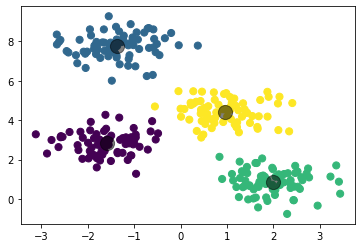

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

> **Příklad**
>
> Pro data výše vyzkoušejte různé počty clusterů (2-6), zobrazte vývoj atributu `inertia_` u vytvořených clusterů

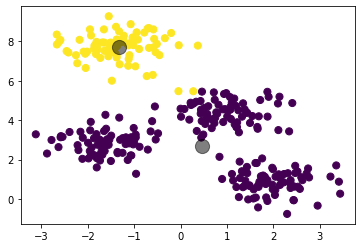

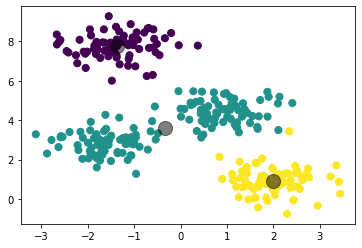

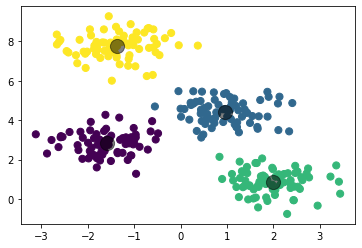

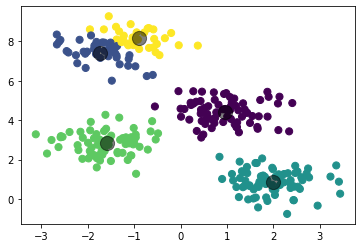

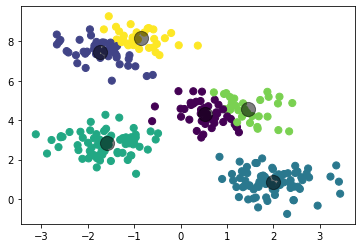

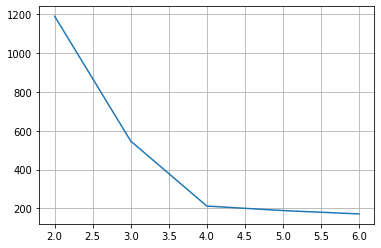

In [20]:
from sklearn.cluster import KMeans
def makeClusters(data, clusterCount):
    kmeans = KMeans(n_clusters=clusterCount)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

    return kmeans.inertia_

cnts = []
inertias = []
for cnt in range(2, 7):
    cnts.append(cnt)
    inertia = makeClusters(X, cnt)
    inertias.append(inertia)
    
plt.plot(cnts, inertias)
plt.grid(which='both')

**Řešení**

In [ ]:
from sklearn.cluster import KMeans
def makeClusters(data, clusterCount):
    kmeans = KMeans(n_clusters=clusterCount)
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    
    plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

    return kmeans.inertia_

cnts = []
inertias = []
for cnt in range(2, 7):
    cnts.append(cnt)
    inertia = makeClusters(X, cnt)
    inertias.append(inertia)
    
plt.plot(cnts, inertias)

## Vnitřek algoritmu

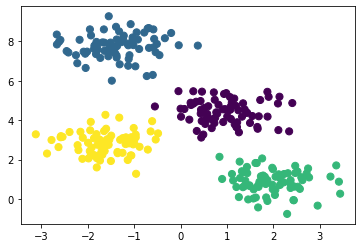

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

> **Příklad**
>
> Na následující datové struktuře proveďte clustering pomocí K-means algoritmu. Zvažte optimální počet clusterů.

In [22]:
data = [{'x': 52, 'y': 11, 'id': 0}, {'x': 51, 'y': 55, 'id': 1}, {'x': 67, 'y': 50, 'id': 2}, {'x': 44, 'y': 52, 'id': 3}, {'x': 68, 'y': 88, 'id': 4}, 
        {'x': 34, 'y': -9, 'id': 5}, {'x': 14, 'y': 60, 'id': 6}, {'x': 76, 'y': 48, 'id': 7}, {'x': 40, 'y': 24, 'id': 8}, {'x': 71, 'y': 92, 'id': 9}, 
        {'x': 89, 'y': 62, 'id': 10}, {'x': 44, 'y': 53, 'id': 11}, {'x': 20, 'y': 42, 'id': 12}, {'x': 6, 'y': 54, 'id': 13}, {'x': 73, 'y': 67, 'id': 14}, 
        {'x': 53, 'y': 39, 'id': 15}, {'x': 52, 'y': 5, 'id': 16}, {'x': 76, 'y': 82, 'id': 17}, {'x': 53, 'y': 93, 'id': 18}, {'x': 97, 'y': 98, 'id': 19}, 
        {'x': 42, 'y': 66, 'id': 20}, {'x': 42, 'y': 95, 'id': 21}, {'x': 43, 'y': 52, 'id': 22}, {'x': 32, 'y': 5, 'id': 23}, {'x': 90, 'y': 99, 'id': 24}, 
        {'x': 47, 'y': -6, 'id': 25}, {'x': 93, 'y': 82, 'id': 26}, {'x': 13, 'y': 25, 'id': 27}, {'x': 54, 'y': 50, 'id': 28}, {'x': 42, 'y': 46, 'id': 29}, 
        {'x': 68, 'y': 89, 'id': 30}, {'x': 22, 'y': 5, 'id': 31}, {'x': 99, 'y': 69, 'id': 32}, {'x': 44, 'y': 75, 'id': 33}, {'x': 3, 'y': 33, 'id': 34}, 
        {'x': 92, 'y': 91, 'id': 35}, {'x': 81, 'y': 42, 'id': 36}, {'x': 63, 'y': 54, 'id': 37}, {'x': 21, 'y': 5, 'id': 38}, {'x': 94, 'y': 74, 'id': 39}, 
        {'x': 15, 'y': 38, 'id': 40}, {'x': 10, 'y': -4, 'id': 41}, {'x': 83, 'y': 85, 'id': 42}, {'x': 73, 'y': 96, 'id': 43}, {'x': 26, 'y': 7, 'id': 44}, 
        {'x': 89, 'y': 98, 'id': 45}, {'x': 74, 'y': 63, 'id': 46}, {'x': 11, 'y': 16, 'id': 47}, {'x': 42, 'y': 83, 'id': 48}, {'x': 40, 'y': 22, 'id': 49}, 
        {'x': 79, 'y': 75, 'id': 50}, {'x': 26, 'y': 17, 'id': 51}, {'x': 98, 'y': 68, 'id': 52}, {'x': 84, 'y': 99, 'id': 53}, {'x': 58, 'y': 19, 'id': 54}, 
        {'x': 102, 'y': 40, 'id': 55}, {'x': 53, 'y': 36, 'id': 56}, {'x': 75, 'y': 94, 'id': 57}, {'x': 48, 'y': -1, 'id': 58}, {'x': 29, 'y': 25, 'id': 59}, 
        {'x': 69, 'y': 96, 'id': 60}, {'x': 14, 'y': 20, 'id': 61}, {'x': 97, 'y': 96, 'id': 62}, {'x': 57, 'y': 49, 'id': 63}, {'x': 85, 'y': 79, 'id': 64}, 
        {'x': 20, 'y': 41, 'id': 65}, {'x': 49, 'y': 12, 'id': 66}, {'x': 20, 'y': 4, 'id': 67}, {'x': 70, 'y': 67, 'id': 68}, {'x': 14, 'y': 20, 'id': 69}, 
        {'x': 50, 'y': 0, 'id': 70}, {'x': 53, 'y': 60, 'id': 71}, {'x': 46, 'y': 41, 'id': 72}, {'x': 52, 'y': 56, 'id': 73}, {'x': 71, 'y': 87, 'id': 74}, 
        {'x': 0, 'y': 35, 'id': 75}, {'x': 62, 'y': 57, 'id': 76}, {'x': 12, 'y': 48, 'id': 77}, {'x': 31, 'y': 5, 'id': 78}, {'x': 49, 'y': 78, 'id': 79}, 
        {'x': 52, 'y': 32, 'id': 80}, {'x': 56, 'y': 84, 'id': 81}, {'x': 96, 'y': 70, 'id': 82}, {'x': 50, 'y': 18, 'id': 83}, {'x': 23, 'y': 3, 'id': 84}, 
        {'x': 51, 'y': 50, 'id': 85}, {'x': -3, 'y': 31, 'id': 86}, {'x': 53, 'y': 56, 'id': 87}, {'x': 49, 'y': 21, 'id': 88}, {'x': 49, 'y': 48, 'id': 89}, 
        {'x': 39, 'y': 24, 'id': 90}, {'x': 99, 'y': 79, 'id': 91}, {'x': 42, 'y': 58, 'id': 92}, {'x': 40, 'y': 38, 'id': 93}, {'x': 69, 'y': 49, 'id': 94}, 
        {'x': 96, 'y': 63, 'id': 95}, {'x': 87, 'y': 50, 'id': 96}, {'x': 53, 'y': 63, 'id': 97}, {'x': 52, 'y': 72, 'id': 98}, {'x': 24, 'y': 53, 'id': 99}]

**Řešení**

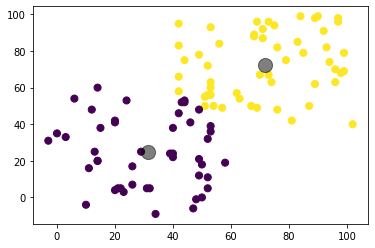

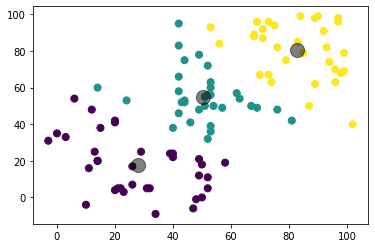

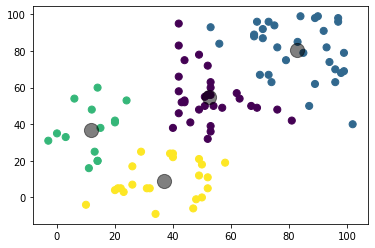

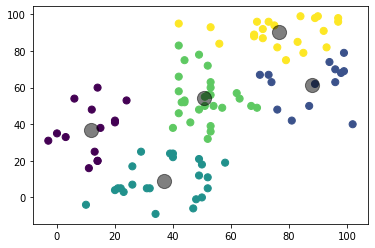

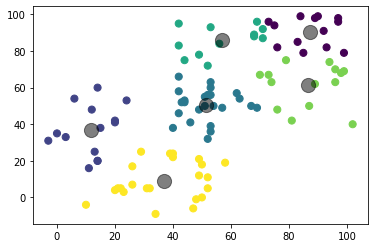

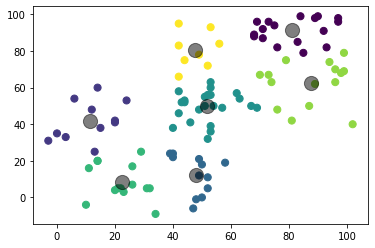

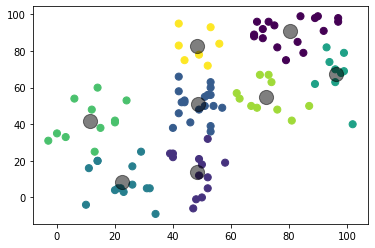

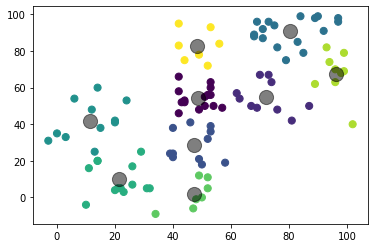

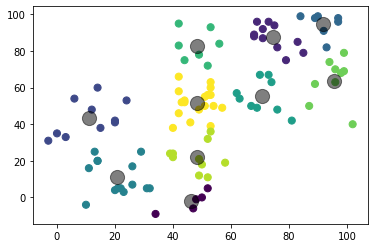

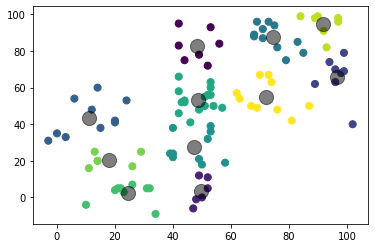

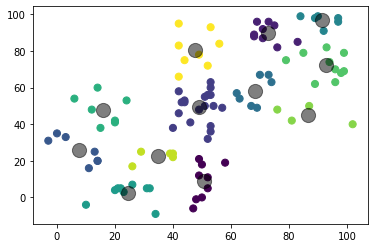

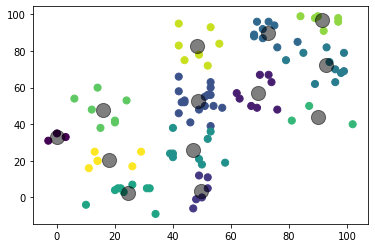

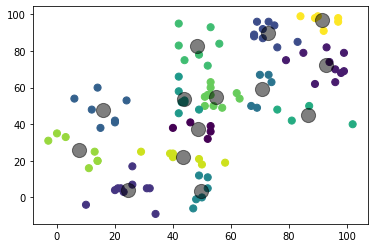

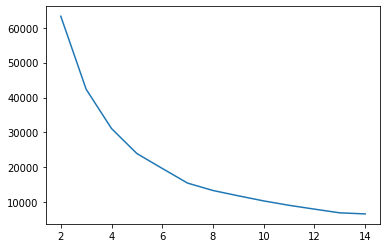

In [27]:
def transformRow(row):
    return [row['x'], row['y']]

def prepareData(source):
    result = []
    for row in source:
        newRow = transformRow(row)
        result.append(newRow)
    return result

preparedData = prepareData(data)
preparedData = np.array([transformRow(row) for row in data])

from sklearn.cluster import KMeans
def makeClusters(data, clusterCount):
    kmeans = KMeans(n_clusters=clusterCount)
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    
    plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

    return kmeans.inertia_

cnts = []
inertias = []
for cnt in range(2, 15):
    cnts.append(cnt)
    inertia = makeClusters(preparedData, cnt)
    inertias.append(inertia)
    
plt.plot(cnts, inertias)

> **Příklad**
>
> S datovou strukturou výše proveďte clustering pomocí hierarchického clusteringu a porovnejte výsledky. Využijte různé submetody a zvažte různé počty clusterů.

**Řešení**

## Elbow method

Metoda Elbow slouží k určení optimálního počtu clusterů

Elbow je odvozeno od zlomu funkce popisující závislost celkové disperze (distorze) na počtu clusterů. Vychází ze skutečnosti, že v jistém rozmezí počtu clusterů roste disperze téměř lineráně, následně dochází ke zlomu. Místo tohoto zlomu určuje optimální počet clusterů.

V případě, kdy by počet clusterů byl spojitý, hledáme fakticky místo, kde druhá derivace funkce nabývá optima.

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/